- Read the data set
- EDA,Feature Engineering
- Divide Our Dataset into independent and dependent feature
- Further divide the data se into train and test data set 
- Standard Scaling on the train and  test data
- Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df=pd.read_csv('Salary_Data.csv')
df.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


Text(0, 0.5, 'Salary')

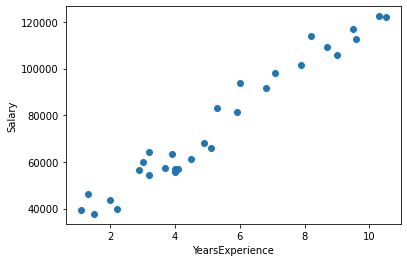

In [35]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [37]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [38]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [40]:
##Divide Our Dataset into independent and dependent feature
x=df[['YearsExperience']] #Independant feature
y=df['Salary'] #dependant feature

In [41]:
x.shape ,y.shape

((30, 1), (30,))

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [44]:
x_train.shape,x_test.shape

((24, 1), (6, 1))

In [45]:
y_train.shape,y_test.shape

((24,), (6,))

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scalar=StandardScaler()

In [48]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [49]:
x_test

array([[ 1.5315002 ],
       [-0.09978613],
       [ 1.04558513],
       [ 0.03904675],
       [-0.68982587],
       [-0.51628477]])

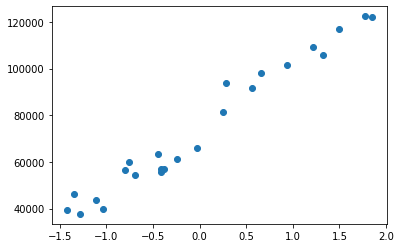

In [50]:
plt.scatter(x_train,y_train)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
regressor=LinearRegression()

In [53]:
# Training the train data
regressor.fit(x_train,y_train)

LinearRegression()

In [54]:
regressor.intercept_

74207.625

In [55]:
regressor.coef_

array([27151.53742583])

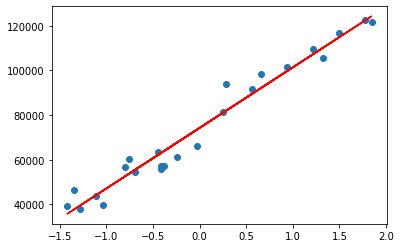

In [56]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),c='r')

## prediction of train data
1. predicted height output = intercept +coef_(Weight)
2.y_pred_train=157.5 +17.03(x_train)

## prediction of test data
1. predicted height output = intercept +coef_(Weight)
2.y_pred_test=157.5 +17.03(x_test)

In [57]:
## prediction for test data
y_pred_test=regressor.predict(x_test)

In [58]:
y_pred_test

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [59]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64

In [60]:
## performance Matries MSE,MAE,RMSE

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [62]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

49830096.85590834
6286.453830757746
7059.043621901506


In [63]:
## Accuracy of Model R Squared and Adjusted R Squared

## R Square 
#### Formula
### R^2=1-SSR/SST
- R^2=Accuracy of Model
- SSR=Sum of Squares of residuals
- SST=total sum of squares

In [64]:
from sklearn.metrics import r2_score

In [65]:
score=r2_score(y_test,y_pred_test)
score

0.9024461774180498

## Adjusted r square
### Adjusted R2 =1-[(1-R2)*(n-1)/(n-k-1)]
##### where :
   - R2: The R2 of the model
   - n:The number of observations
   - k:The number of predictor variables

In [66]:
#display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8780577217725622